In [17]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("data/covid/france/chiffres-cles.csv", sep=",")

In [19]:
df.columns

Index(['date', 'granularite', 'maille_code', 'maille_nom', 'cas_confirmes',
       'cas_ehpad', 'cas_confirmes_ehpad', 'cas_possibles_ehpad', 'deces',
       'deces_ehpad', 'reanimation', 'hospitalises', 'gueris', 'depistes',
       'source_nom', 'source_url', 'source_archive', 'source_type'],
      dtype='object')

In [20]:
df.dtypes

date                    object
granularite             object
maille_code             object
maille_nom              object
cas_confirmes          float64
cas_ehpad              float64
cas_confirmes_ehpad    float64
cas_possibles_ehpad    float64
deces                  float64
deces_ehpad            float64
reanimation            float64
hospitalises           float64
gueris                 float64
depistes               float64
source_nom              object
source_url              object
source_archive          object
source_type             object
dtype: object

In [21]:
df[df["maille_code"] == "FRA"][["date", "cas_confirmes", "source_nom"]]

,date,cas_confirmes,source_nom
13,2020-01-24,3.0,Santé publique France
14,2020-01-24,3.0,Ministère des Solidarités et de la Santé
22,2020-01-25,3.0,Santé publique France
27,2020-01-26,3.0,Santé publique France
33,2020-01-27,3.0,Santé publique France
...,...,...,...
9664,2020-05-10,NaN,OpenCOVID19-fr
9784,2020-05-11,139519.0,Ministère des Solidarités et de la Santé
9785,2020-05-11,NaN,OpenCOVID19-fr
9905,2020-05-12,140227.0,Ministère des Solidarités et de la Santé


Il y a des valeurs NAN selon les sources, on souhaite savoir s'il y a des données conflictuelles

In [22]:
for d in df["date"].unique():
    s = df[np.logical_and(df["maille_code"] == "FRA", df["date"] == d)]["cas_confirmes"].dropna()
    if s.size > 1:
        if s.drop_duplicates().size > 1:
            print(d)
            print(s)

2020-02-07
91    11.0
92     6.0
Name: cas_confirmes, dtype: float64
2020-02-25
157    12.0
158    14.0
Name: cas_confirmes, dtype: float64
2020-02-26
170    17.0
171    18.0
Name: cas_confirmes, dtype: float64
2020-02-28
194    38.0
195    57.0
Name: cas_confirmes, dtype: float64
2020-02-29
231     73.0
232    100.0
Name: cas_confirmes, dtype: float64
2020-03-02
270    178.0
271    191.0
Name: cas_confirmes, dtype: float64
2020-03-14
1603    4499.0
1604    4500.0
Name: cas_confirmes, dtype: float64


On trouve quelques cas conflictuels. Pour résoudre le souci on prendra la valeur maximum des deux à chaque fois. On supprime donc toutes les lignes à cas confirmes NAN, et pour les cas à plusieurs sources on prendra le max.

In [37]:
# on ne s'intéresse qu'à la france entière pour l'instant
df_copy = df.copy()
df_copy = df_copy[df_copy["maille_code"] == "FRA"]

In [38]:
cas_confirmes_df = df_copy.drop(df_copy[df_copy["cas_confirmes"].isna()].index)

In [39]:
evolution_par_jour = cas_confirmes_df.groupby("date", as_index=False).first()

In [40]:
population_FR = 67000000
evolution_par_jour["susceptible"] = population_FR - (evolution_par_jour["cas_confirmes"] + evolution_par_jour["deces"] + evolution_par_jour["gueris"])

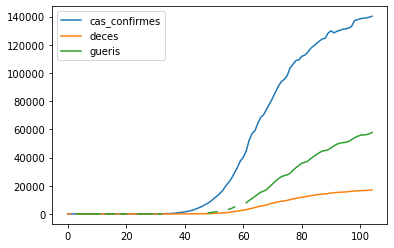

In [43]:
evolution_par_jour[["cas_confirmes", "deces", "gueris"]].plot()

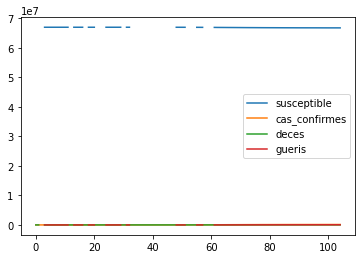

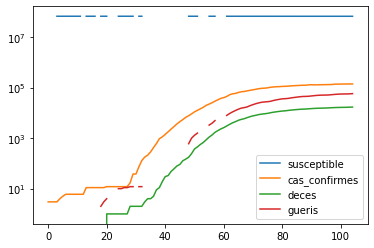

In [44]:
evolution_par_jour[["susceptible", "cas_confirmes", "deces", "gueris"]].plot()
evolution_par_jour[["susceptible", "cas_confirmes", "deces", "gueris"]].plot(logy=True)

In [45]:
evolution_par_jour.to_csv("data/covid/france/evolution_par_jour.csv")

In [46]:
evolution_par_jour

,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,gueris,depistes,source_nom,source_url,source_archive,source_type,susceptible
0,2020-01-24,pays,FRA,France,3.0,NaN,NaN,NaN,0.0,NaN,NaN,3.0,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200124202351/htt...,sante-publique-france,NaN
1,2020-01-25,pays,FRA,France,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200126024644/htt...,sante-publique-france,NaN
2,2020-01-26,pays,FRA,France,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200127144431/htt...,sante-publique-france,NaN
3,2020-01-27,pays,FRA,France,3.0,NaN,NaN,NaN,0.0,NaN,0.0,3.0,0.0,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200128153608/htt...,sante-publique-france,66999997.0
4,2020-01-28,pays,FRA,France,4.0,NaN,NaN,NaN,0.0,NaN,1.0,4.0,0.0,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200212192607/htt...,sante-publique-france,66999996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2020-05-08,pays,FRA,France,138421.0,72548.0,34890.0,NaN,16497.0,9733.0,2868.0,22724.0,55782.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66789300.0
101,2020-05-09,pays,FRA,France,138854.0,72850.0,35046.0,NaN,16573.0,9737.0,2812.0,22614.0,56038.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66788535.0
102,2020-05-10,pays,FRA,France,139063.0,73143.0,35236.0,NaN,16642.0,9738.0,2776.0,22569.0,56217.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66788078.0
103,2020-05-11,pays,FRA,France,139519.0,73099.0,35195.0,NaN,16820.0,9823.0,2712.0,22284.0,56724.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66786937.0
